In [ ]:
%pip install missingno

In [ ]:
%pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.linear_model import Ridge , Lasso

In [3]:
df=pd.read_csv('BMW_Data.csv')

In [4]:
df.head(10)

Date  Adj_Close      Close       High        Low       Open   Volume
0  1996-11-08   8.100290  18.171000  18.209999  18.171000  18.209999   767000
1  1996-11-11   8.078445  18.122000  18.200001  18.082001  18.190001   260000
2  1996-11-12   8.139520  18.259001  18.327999  18.091999  18.160999  1066000
3  1996-11-13   8.126592  18.230000  18.344000  18.190001  18.344000   793000
4  1996-11-14   8.152893  18.289000  18.289000  18.132000  18.205000   351000
5  1996-11-15   8.219315  18.438000  18.440001  18.268999  18.308001   624000
6  1996-11-18   8.231796  18.466000  18.584000  18.365999  18.372999   624000
7  1996-11-19   8.266567  18.544001  18.544001  18.313999  18.485001   442000
8  1996-11-20   8.135953  18.250999  18.603001  18.243000  18.485001   546000
9  1996-11-21   8.143977  18.268999  18.308001  18.194000  18.308001   286000

In [5]:
df.tail(10)

Date  Adj_Close      Close       High        Low       Open  \
7202  2024-12-12  79.980003  79.980003  80.220001  78.279999  78.400002   
7203  2024-12-13  80.160004  80.160004  81.839996  79.879997  79.879997   
7204  2024-12-16  77.620003  77.620003  80.080002  77.139999  79.559998   
7205  2024-12-17  78.360001  78.360001  78.760002  76.919998  77.000000   
7206  2024-12-18  78.000000  78.000000  79.199997  78.000000  79.000000   
7207  2024-12-19  77.279999  77.279999  78.379997  76.900002  77.080002   
7208  2024-12-20  77.580002  77.580002  77.860001  76.120003  76.699997   
7209  2024-12-23  76.940002  76.940002  77.680000  76.260002  77.620003   
7210  2024-12-27  78.339996  78.339996  78.459999  76.739998  76.879997   
7211  2024-12-30  78.980003  78.980003  79.040001  77.839996  77.919998   

       Volume  
7202  1610079  
7203  1805470  
7204  1521818  
7205  1018266  
7206  1023527  
7207  1297262  
7208  2000177  
7209   642208  
7210   958948  
7211   456155

In [6]:
df.describe()

Adj_Close        Close         High          Low         Open  \
count  7212.000000  7212.000000  7212.000000  7212.000000  7212.000000   
mean     36.020199    56.427535    57.111143    55.720695    56.446728   
std      23.641099    25.245886    25.415148    25.055661    25.252263   
min       8.065074    17.040001    17.815001    16.000000    17.280001   
25%      16.443254    34.457500    34.900002    33.887500    34.465001   
50%      26.329212    49.372501    50.094999    48.752501    49.267500   
75%      53.329208    79.332500    80.105000    78.342497    79.379997   
max     108.059044   122.599998   123.750000   120.349998   123.300003   

             Volume  
count  7.212000e+03  
mean   2.107946e+06  
std    1.467180e+06  
min    0.000000e+00  
25%    1.194308e+06  
50%    1.793778e+06  
75%    2.636572e+06  
max    2.871954e+07

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7212 non-null   object 
 1   Adj_Close  7212 non-null   float64
 2   Close      7212 non-null   float64
 3   High       7212 non-null   float64
 4   Low        7212 non-null   float64
 5   Open       7212 non-null   float64
 6   Volume     7212 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 394.5+ KB


In [8]:
print(df.describe())

         Adj_Close        Close         High          Low         Open  \
count  7212.000000  7212.000000  7212.000000  7212.000000  7212.000000   
mean     36.020199    56.427535    57.111143    55.720695    56.446728   
std      23.641099    25.245886    25.415148    25.055661    25.252263   
min       8.065074    17.040001    17.815001    16.000000    17.280001   
25%      16.443254    34.457500    34.900002    33.887500    34.465001   
50%      26.329212    49.372501    50.094999    48.752501    49.267500   
75%      53.329208    79.332500    80.105000    78.342497    79.379997   
max     108.059044   122.599998   123.750000   120.349998   123.300003   

             Volume  
count  7.212000e+03  
mean   2.107946e+06  
std    1.467180e+06  
min    0.000000e+00  
25%    1.194308e+06  
50%    1.793778e+06  
75%    2.636572e+06  
max    2.871954e+07  


In [9]:
df.isnull().sum()

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

<Axes: >

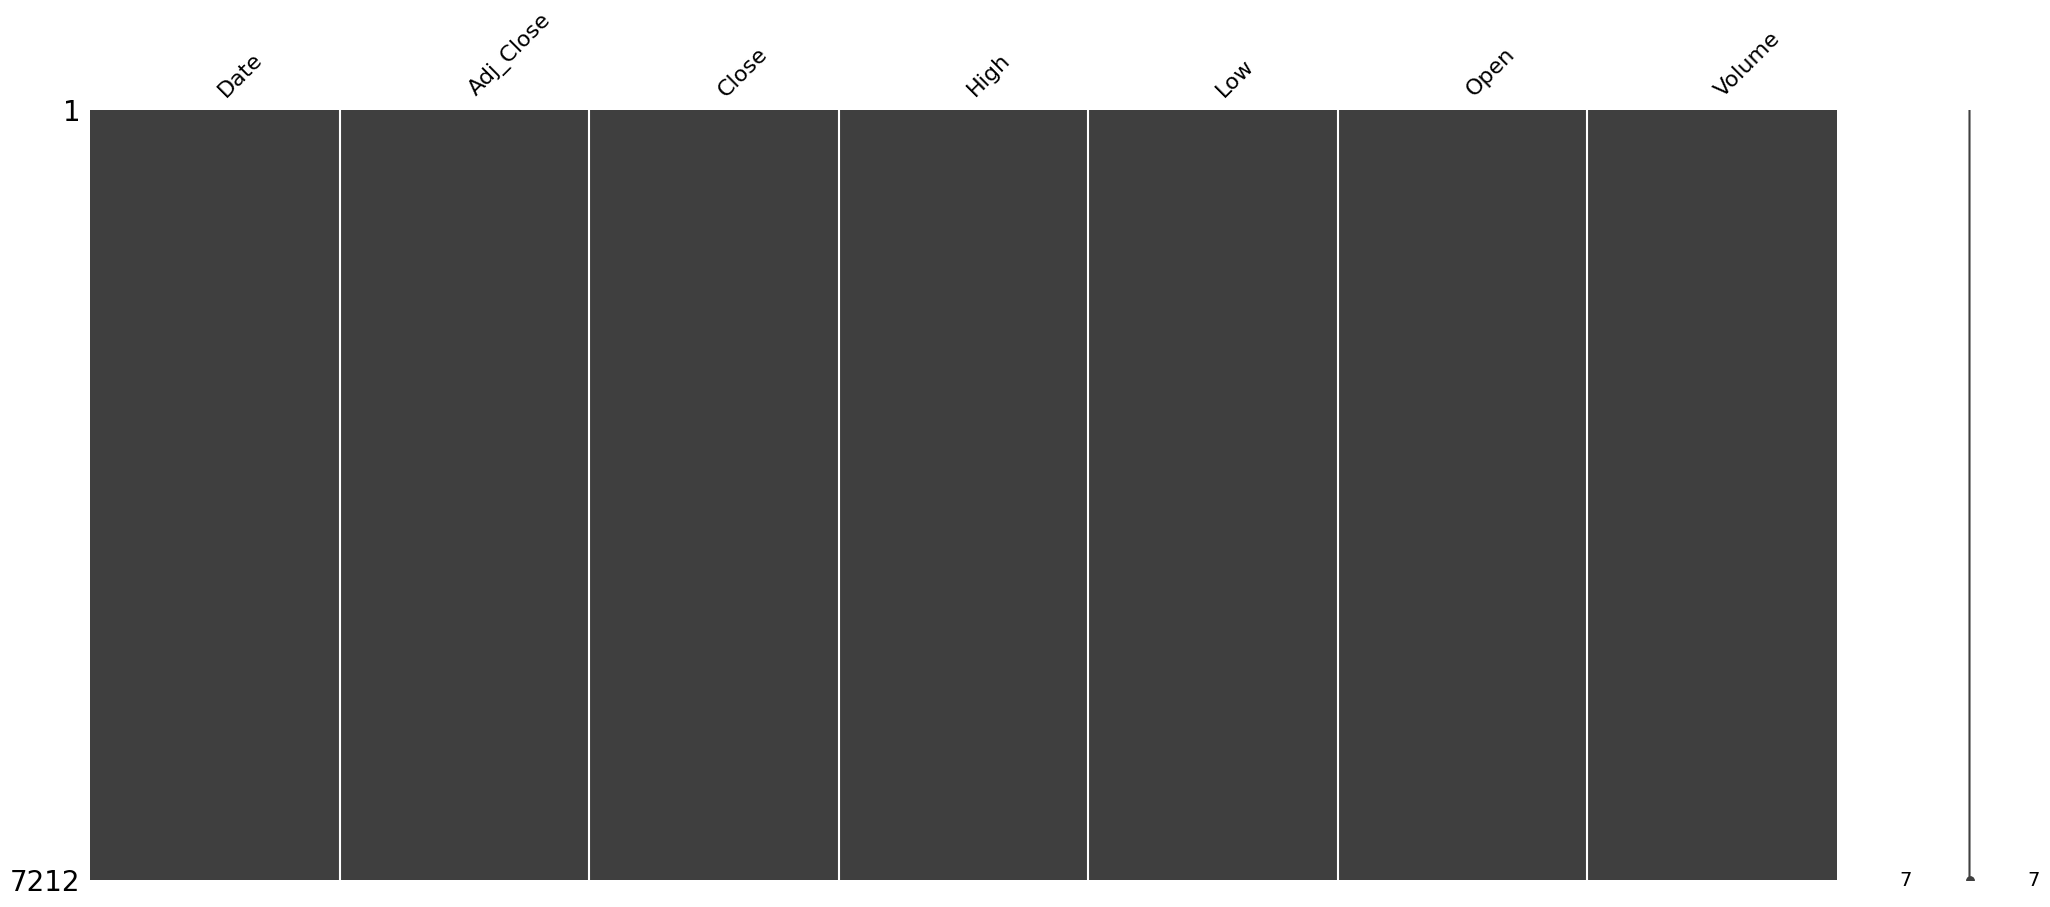

In [10]:
msno.matrix(df)

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_Week'] = df['Date'].dt.day_name()


In [13]:
df['Month_of_year'] = df['Date'].dt.month_name()

In [14]:
df['Year'] = df['Date'].dt.year

In [15]:
#Moving Averages
df['SMA_10'] = df['Close'].rolling(window=10).mean()
df['SMA_20'] = df['Close'].rolling(window=20).mean()

In [16]:
#Exponential Moving Averages (EMA)
df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['EMA_20'] = df['Close'].ewm(span=20, adjust=False).mean()

In [17]:
#Relative Strength Index (RSI)
def calculate_rsi(data, n=14):
    delta = df['Close'].diff().dropna()
    gain, loss = delta.copy(), delta.copy()
    gain[gain < 0] = 0
    loss[loss > 0] = 0
    avg_gain = gain.rolling(window=n, min_periods=1).mean()
    avg_loss = abs(loss).rolling(window=n, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100.0 - (100.0 / (1.0 + rs))
    return rsi

df['RSI_14'] = calculate_rsi(df, n=14)


In [18]:
#Momentum
df['Momentum_10'] = df['Close'] - df['Close'].shift(10)

In [19]:
#Rate of Change (ROC)
df['ROC_10'] = ((df['Close'] - df['Close'].shift(10)) / df['Close'].shift(10)) * 100

In [20]:
df.drop('Date', axis=1, inplace=True)

# Exploratory Data Analysis on the synthesised stock data and the modified dataset

In [21]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

In [22]:
df.isnull().sum()

Adj_Close         0
Close             0
High              0
Low               0
Open              0
Volume            0
Day_of_Week       0
Month_of_year     0
Year              0
SMA_10            9
SMA_20           19
EMA_10            0
EMA_20            0
RSI_14            1
Momentum_10      10
ROC_10           10
dtype: int64

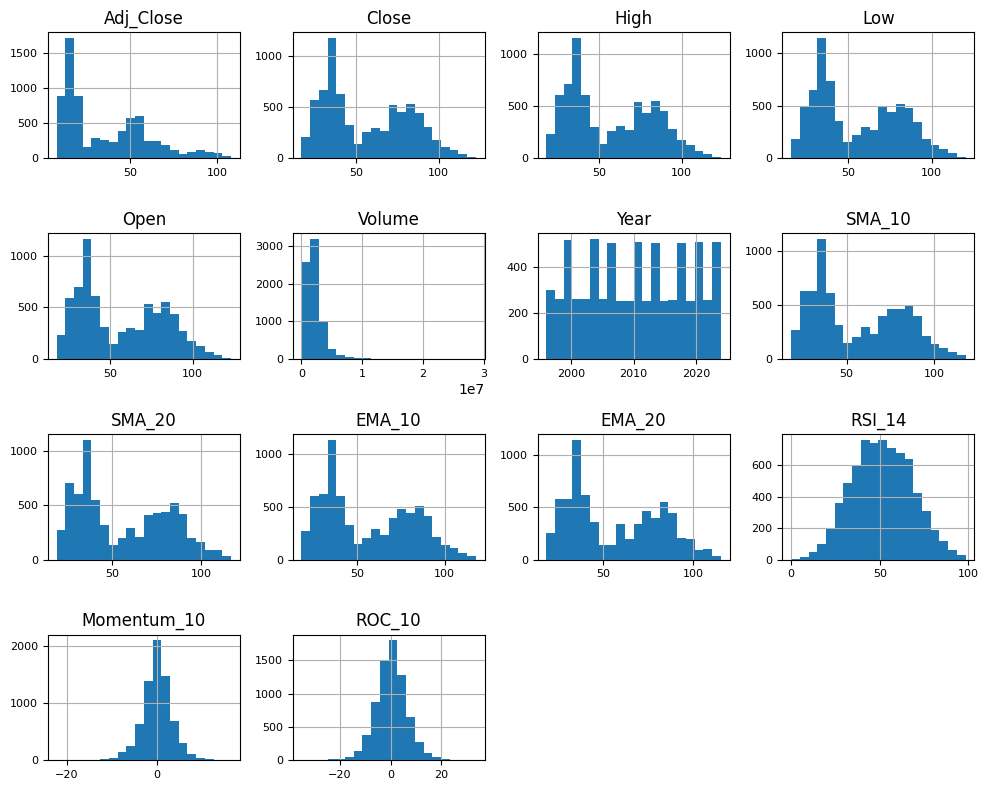

In [23]:
# Basic EDA
df[num_cols].hist(figsize=(10, 8), bins=20, xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.xlabel('Value', fontsize=10 , rotation=45)
plt.ylabel('Frequency', fontsize=10)
plt.show()

In [24]:
df.isnull().sum()

Adj_Close         0
Close             0
High              0
Low               0
Open              0
Volume            0
Day_of_Week       0
Month_of_year     0
Year              0
SMA_10            9
SMA_20           19
EMA_10            0
EMA_20            0
RSI_14            1
Momentum_10      10
ROC_10           10
dtype: int64

In [25]:
df.describe()

Adj_Close        Close         High          Low         Open  \
count  7212.000000  7212.000000  7212.000000  7212.000000  7212.000000   
mean     36.020199    56.427535    57.111143    55.720695    56.446728   
std      23.641099    25.245886    25.415148    25.055661    25.252263   
min       8.065074    17.040001    17.815001    16.000000    17.280001   
25%      16.443254    34.457500    34.900002    33.887500    34.465001   
50%      26.329212    49.372501    50.094999    48.752501    49.267500   
75%      53.329208    79.332500    80.105000    78.342497    79.379997   
max     108.059044   122.599998   123.750000   120.349998   123.300003   

             Volume         Year       SMA_10       SMA_20       EMA_10  \
count  7.212000e+03  7212.000000  7203.000000  7193.000000  7212.000000   
mean   2.107946e+06  2010.344426    56.437896    56.449243    56.390339   
std    1.467180e+06     8.143802    25.198461    25.152095    25.200704   
min    0.000000e+00  1996.000000    18.303900    19.052050    18.162090   
25%    1.194308e+06  2003.000000    34.438000    34.493000    34.403627   
50%    1.793778e+06  2010.000000    49.639500    49.184500    49.265100   
75%    2.636572e+06  2017.000000    79.339000    79.577499    79.380659   
max    2.871954e+07  2024.000000   117.955000   116.774999   117.791529   

            EMA_20       RSI_14  Momentum_10       ROC_10  
count  7212.000000  7211.000000  7202.000000  7202.000000  
mean     56.350821    51.523860     0.083338     0.408848  
std      25.160896    16.846153     3.422185     6.415539  
min      18.166333     0.000000   -22.279999   -35.147236  
25%      34.504767    39.412790    -1.739998    -3.357483  
50%      48.663108    51.145041     0.190002     0.410260  
75%      79.486187    63.775117     1.970001     3.987967  
max     115.548412    98.395004    16.599998    33.630721

In [26]:
df.__dataframe__()

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Adj_Close      7212 non-null   float64
 1   Close          7212 non-null   float64
 2   High           7212 non-null   float64
 3   Low            7212 non-null   float64
 4   Open           7212 non-null   float64
 5   Volume         7212 non-null   int64  
 6   Day_of_Week    7212 non-null   object 
 7   Month_of_year  7212 non-null   object 
 8   Year           7212 non-null   int32  
 9   SMA_10         7203 non-null   float64
 10  SMA_20         7193 non-null   float64
 11  EMA_10         7212 non-null   float64
 12  EMA_20         7212 non-null   float64
 13  RSI_14         7211 non-null   float64
 14  Momentum_10    7202 non-null   float64
 15  ROC_10         7202 non-null   float64
dtypes: float64(12), int32(1), int64(1), object(2)
memory usage: 873.5+ KB


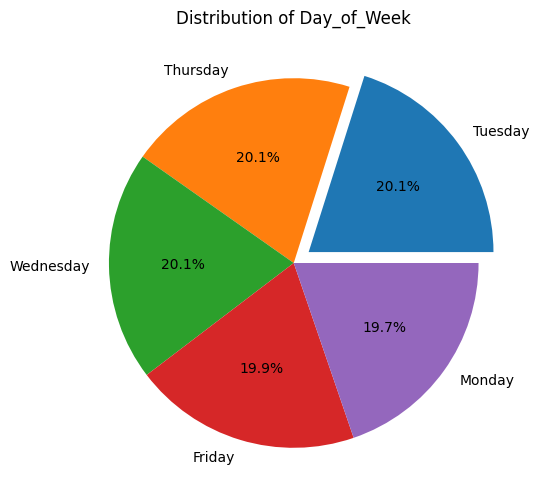

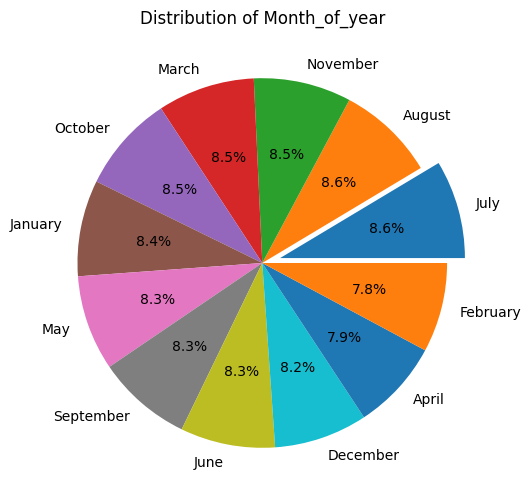

In [28]:
for col in cat_cols:
  plt.figure(figsize=(10, 6))
  num_wedges = len(df[col].value_counts())
  explode = (0.1,) + (0,) * (num_wedges - 1)
  plt.pie(df[col].value_counts(), labels=df[col].value_counts().index,
          autopct='%1.1f%%', explode=explode)
  plt.title(f'Distribution of {col}')
  plt.show()

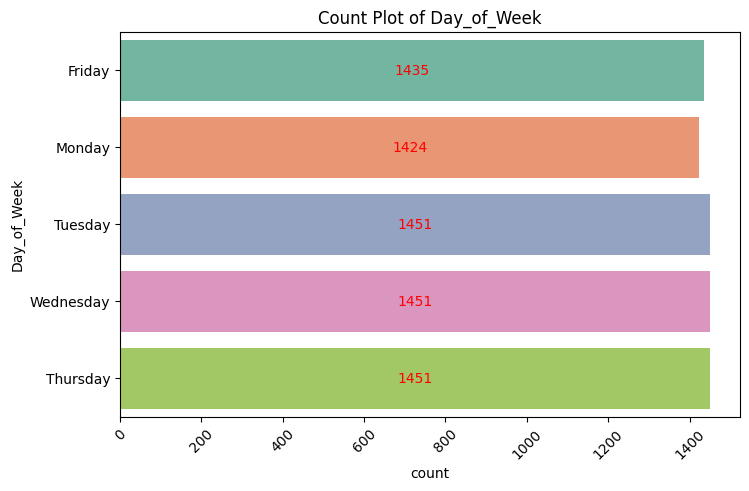

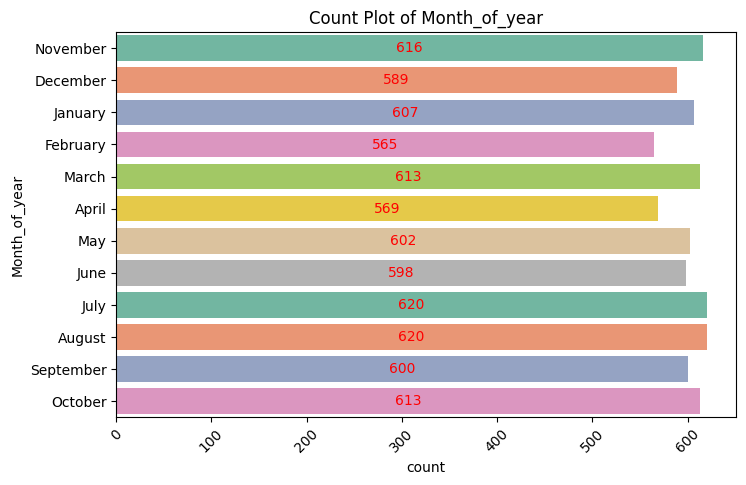

In [29]:
for col in cat_cols:
  plt.figure(figsize=(8, 5))
  sns.countplot(y=col, data=df , palette='Set2')
  plt.title(f'Count Plot of {col}')
  plt.xticks(rotation=45)
  ax = plt.gca()
  for p in ax.patches:

    width = p.get_width()
    ax.text(width / 2,
            p.get_y() + p.get_height() / 2,
            '{:1.0f}'.format(width),
            ha="center",
            va="center" , color = 'red')
  plt.show()

  plt.show()

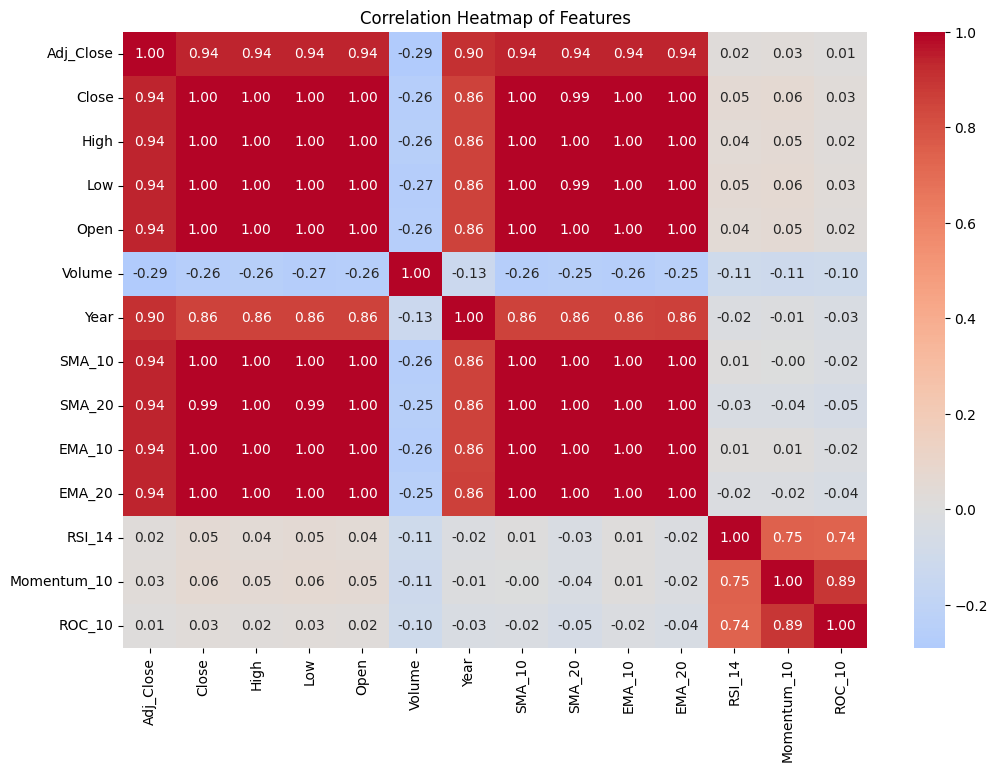

In [30]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

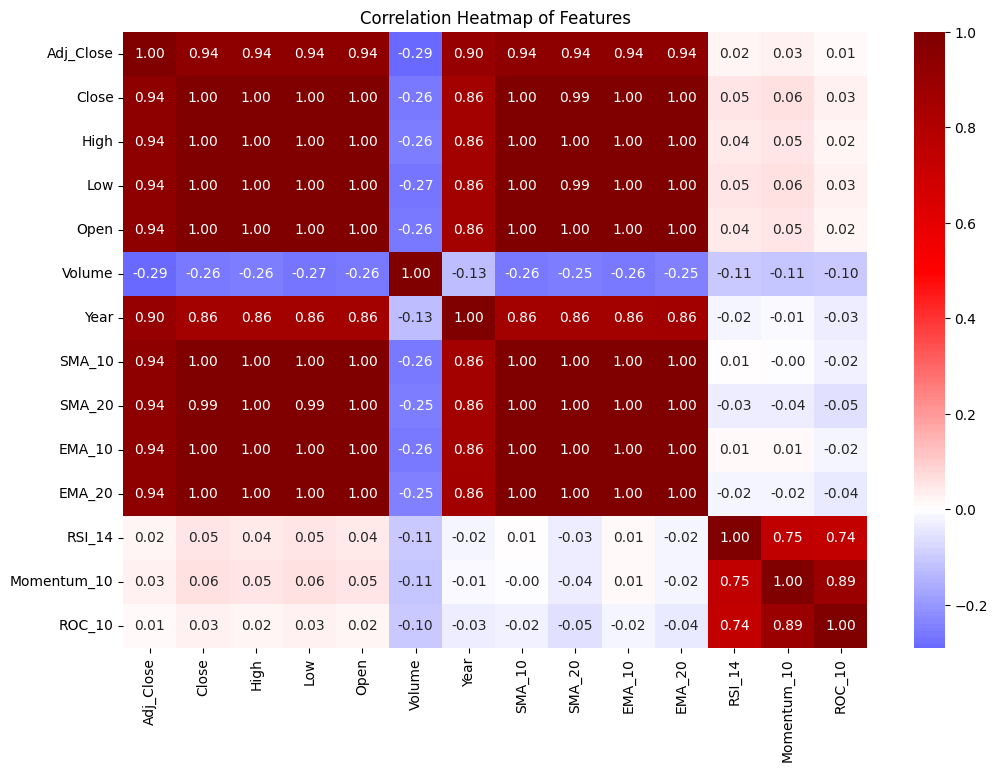

In [31]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='seismic', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

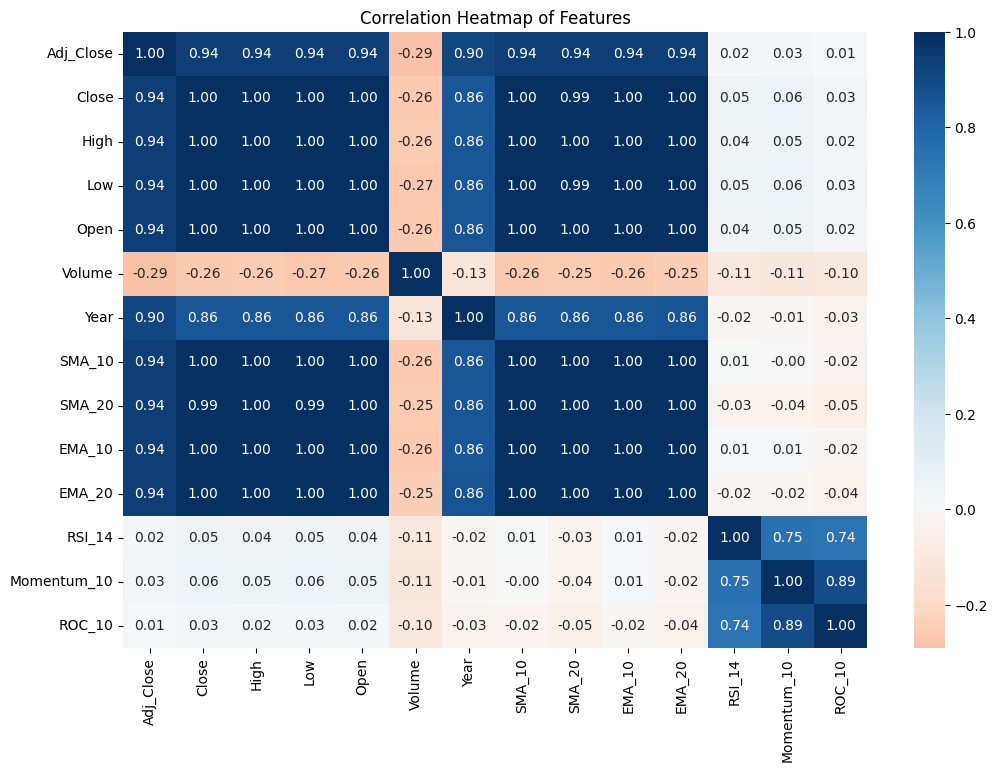

In [32]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

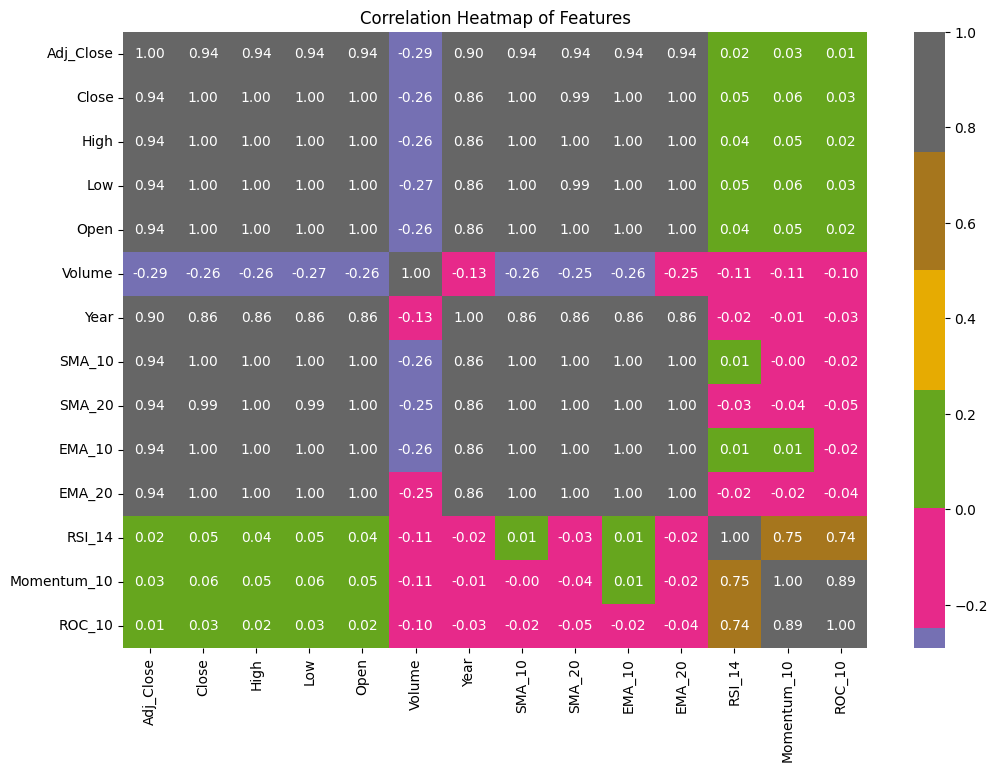

In [33]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Dark2', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

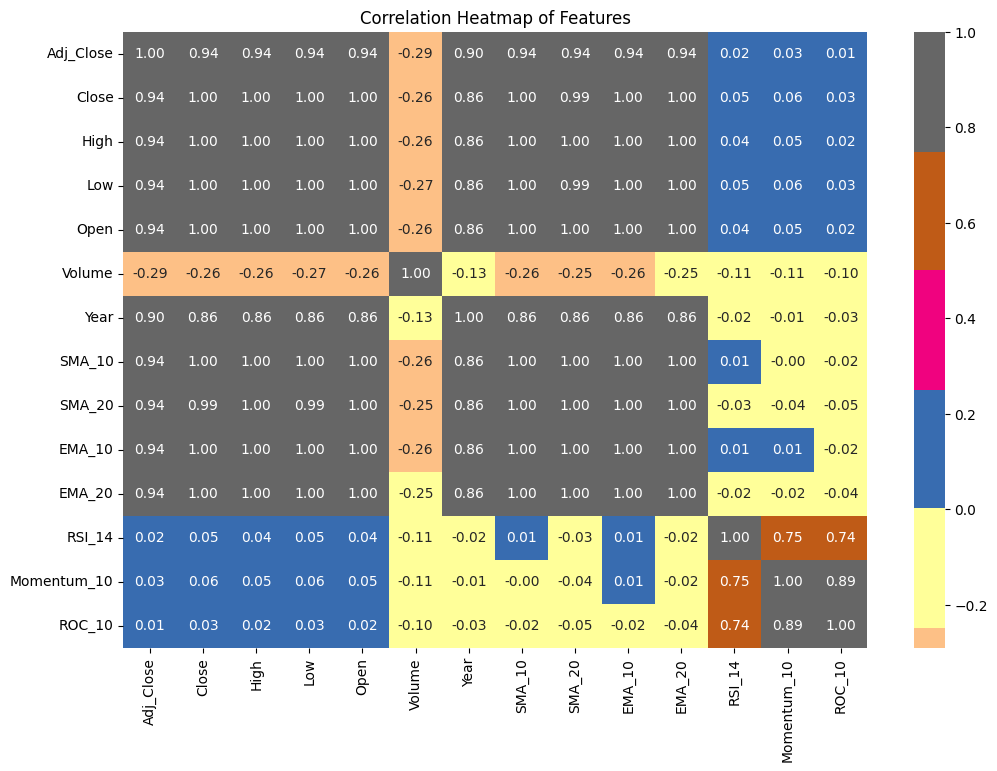

In [34]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Accent', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

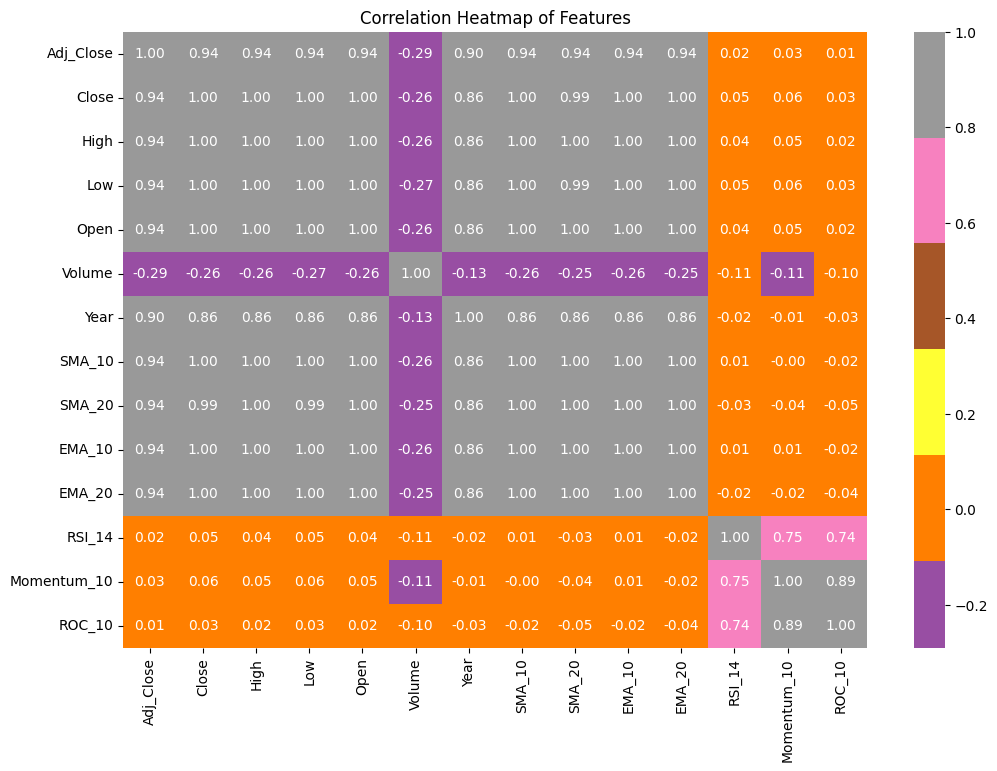

In [35]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Set1', center=0)
plt.title('Correlation Heatmap of Features')
plt.show()

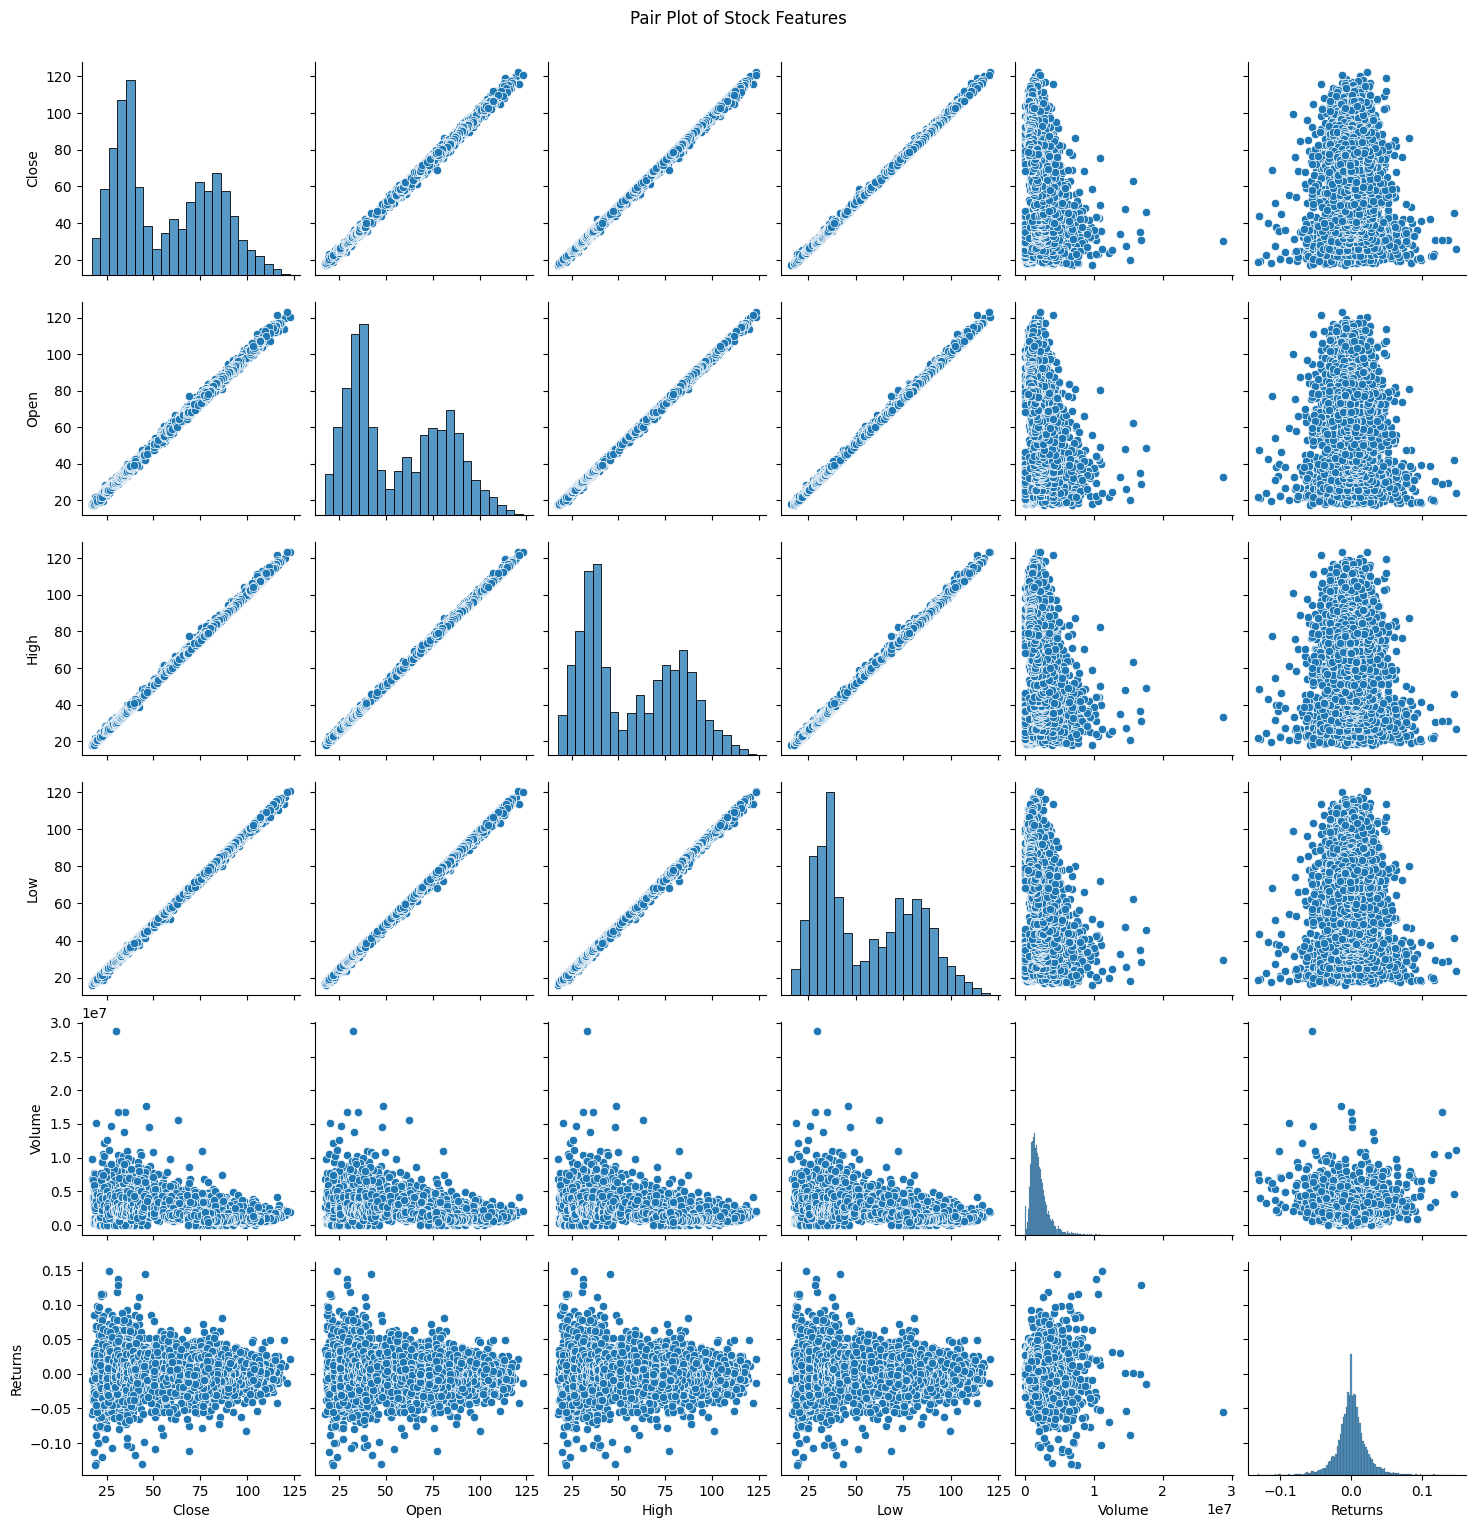

In [36]:
df['Returns'] = df['Close'].pct_change()
sns.pairplot(df[['Close', 'Open', 'High', 'Low', 'Volume', 'Returns']])
plt.suptitle('Pair Plot of Stock Features', y=1.02)
plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7212 entries, 0 to 7211
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Adj_Close      7212 non-null   float64
 1   Close          7212 non-null   float64
 2   High           7212 non-null   float64
 3   Low            7212 non-null   float64
 4   Open           7212 non-null   float64
 5   Volume         7212 non-null   int64  
 6   Day_of_Week    7212 non-null   object 
 7   Month_of_year  7212 non-null   object 
 8   Year           7212 non-null   int32  
 9   SMA_10         7203 non-null   float64
 10  SMA_20         7193 non-null   float64
 11  EMA_10         7212 non-null   float64
 12  EMA_20         7212 non-null   float64
 13  RSI_14         7211 non-null   float64
 14  Momentum_10    7202 non-null   float64
 15  ROC_10         7202 non-null   float64
 16  Returns        7211 non-null   float64
dtypes: float64(13), int32(1), int64(1), object(2)
memory

In [38]:
df.describe()

Adj_Close        Close         High          Low         Open  \
count  7212.000000  7212.000000  7212.000000  7212.000000  7212.000000   
mean     36.020199    56.427535    57.111143    55.720695    56.446728   
std      23.641099    25.245886    25.415148    25.055661    25.252263   
min       8.065074    17.040001    17.815001    16.000000    17.280001   
25%      16.443254    34.457500    34.900002    33.887500    34.465001   
50%      26.329212    49.372501    50.094999    48.752501    49.267500   
75%      53.329208    79.332500    80.105000    78.342497    79.379997   
max     108.059044   122.599998   123.750000   120.349998   123.300003   

             Volume         Year       SMA_10       SMA_20       EMA_10  \
count  7.212000e+03  7212.000000  7203.000000  7193.000000  7212.000000   
mean   2.107946e+06  2010.344426    56.437896    56.449243    56.390339   
std    1.467180e+06     8.143802    25.198461    25.152095    25.200704   
min    0.000000e+00  1996.000000    18.303900    19.052050    18.162090   
25%    1.194308e+06  2003.000000    34.438000    34.493000    34.403627   
50%    1.793778e+06  2010.000000    49.639500    49.184500    49.265100   
75%    2.636572e+06  2017.000000    79.339000    79.577499    79.380659   
max    2.871954e+07  2024.000000   117.955000   116.774999   117.791529   

            EMA_20       RSI_14  Momentum_10       ROC_10      Returns  
count  7212.000000  7211.000000  7202.000000  7202.000000  7211.000000  
mean     56.350821    51.523860     0.083338     0.408848     0.000429  
std      25.160896    16.846153     3.422185     6.415539     0.021234  
min      18.166333     0.000000   -22.279999   -35.147236    -0.131850  
25%      34.504767    39.412790    -1.739998    -3.357483    -0.010047  
50%      48.663108    51.145041     0.190002     0.410260     0.000000  
75%      79.486187    63.775117     1.970001     3.987967     0.010624  
max     115.548412    98.395004    16.599998    33.630721     0.148384

In [39]:
df.isnull().sum()

Adj_Close         0
Close             0
High              0
Low               0
Open              0
Volume            0
Day_of_Week       0
Month_of_year     0
Year              0
SMA_10            9
SMA_20           19
EMA_10            0
EMA_20            0
RSI_14            1
Momentum_10      10
ROC_10           10
Returns           1
dtype: int64

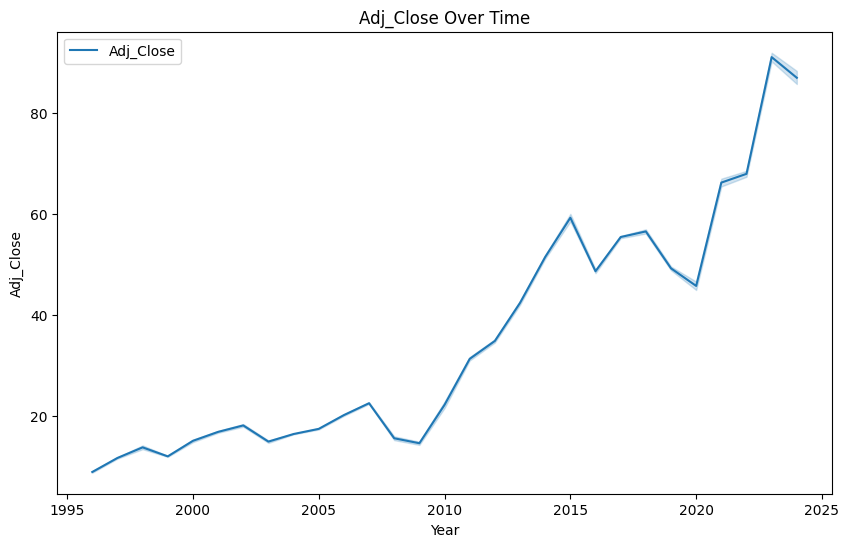

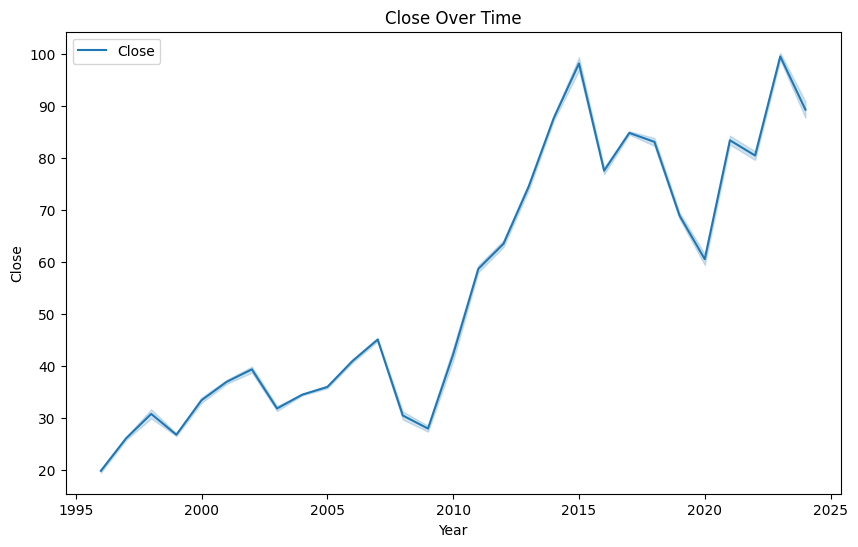

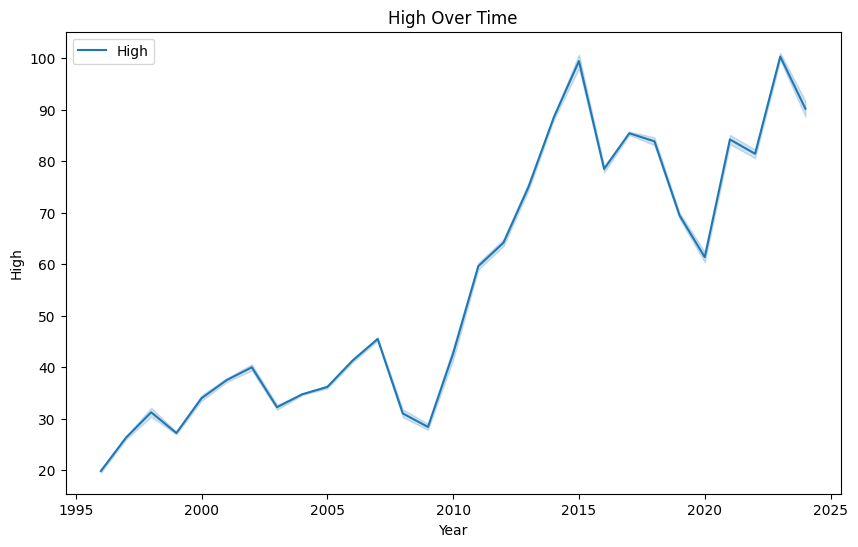

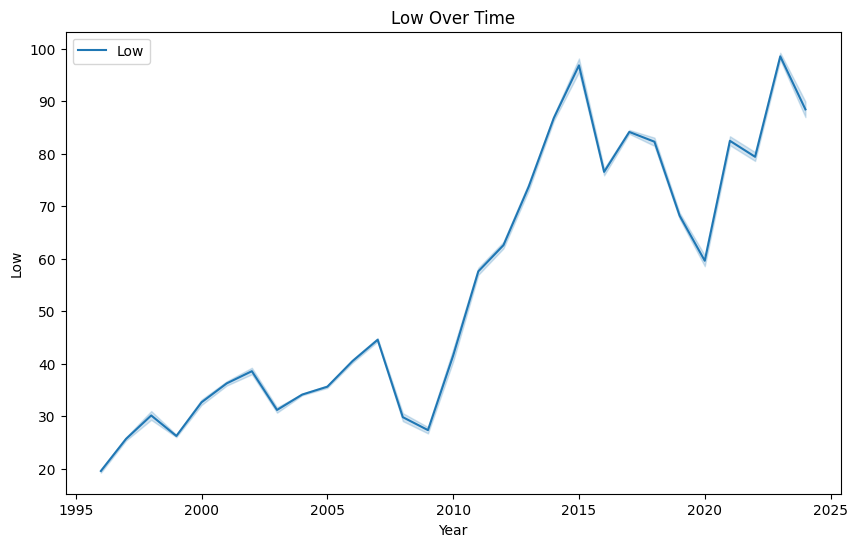

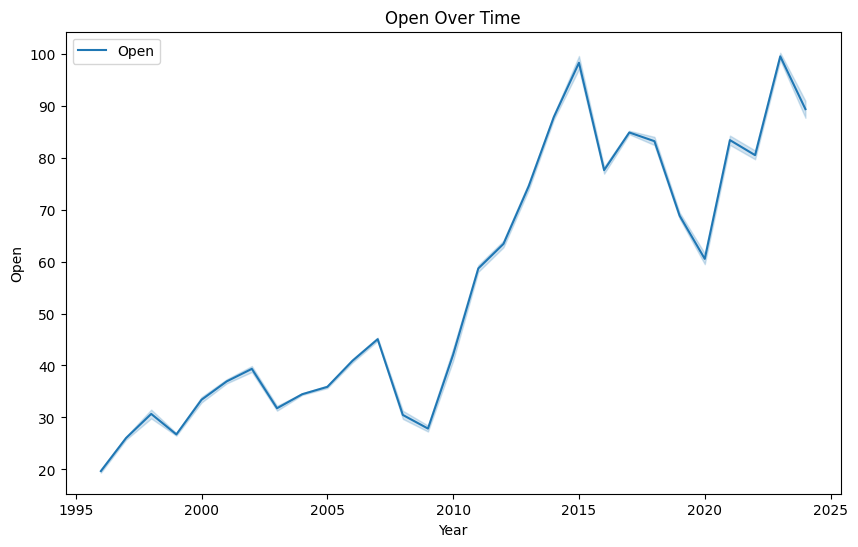

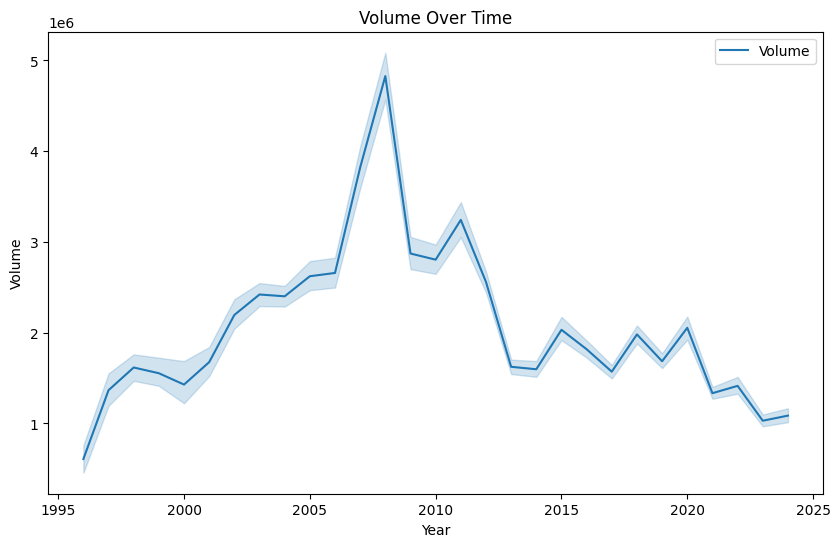

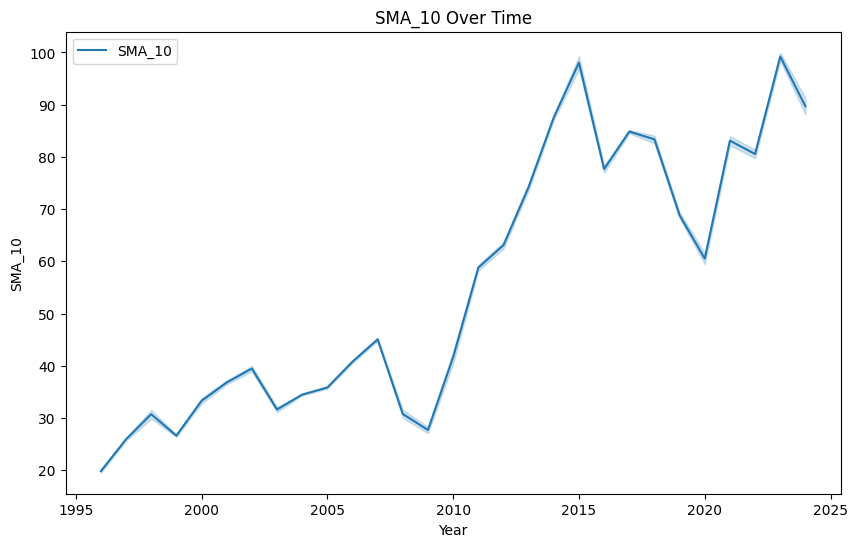

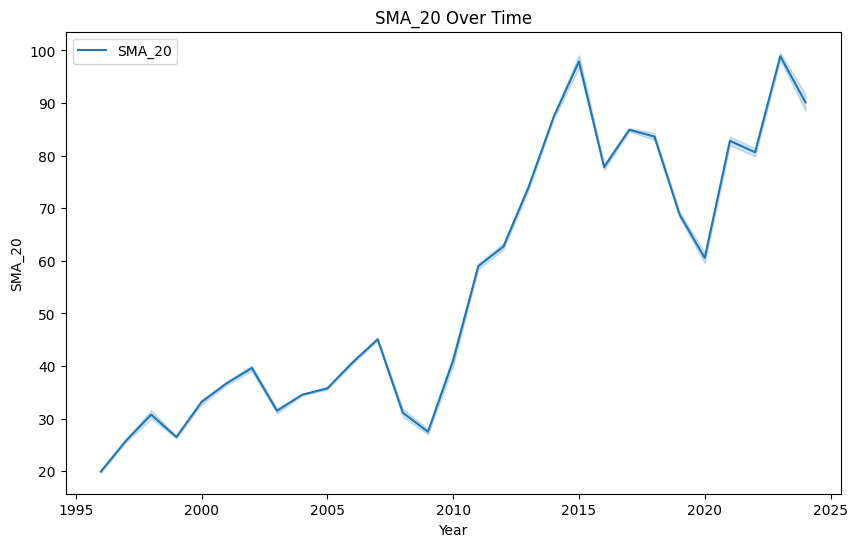

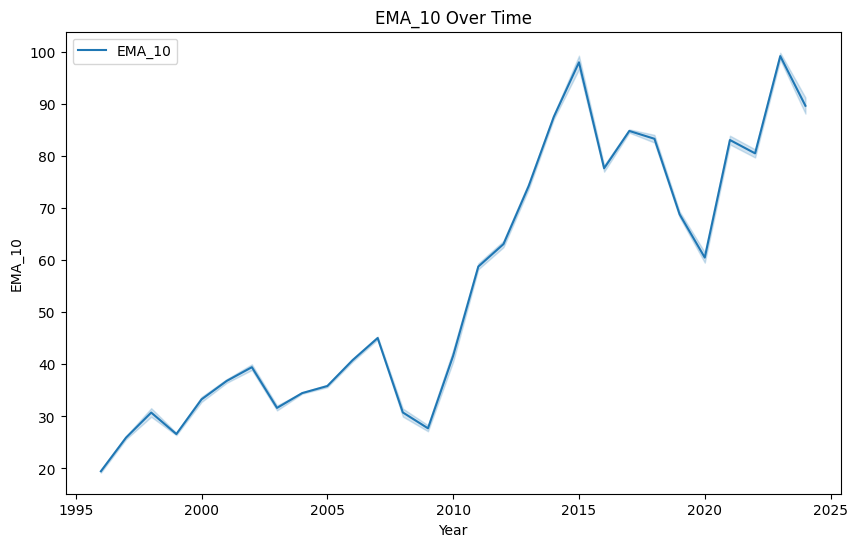

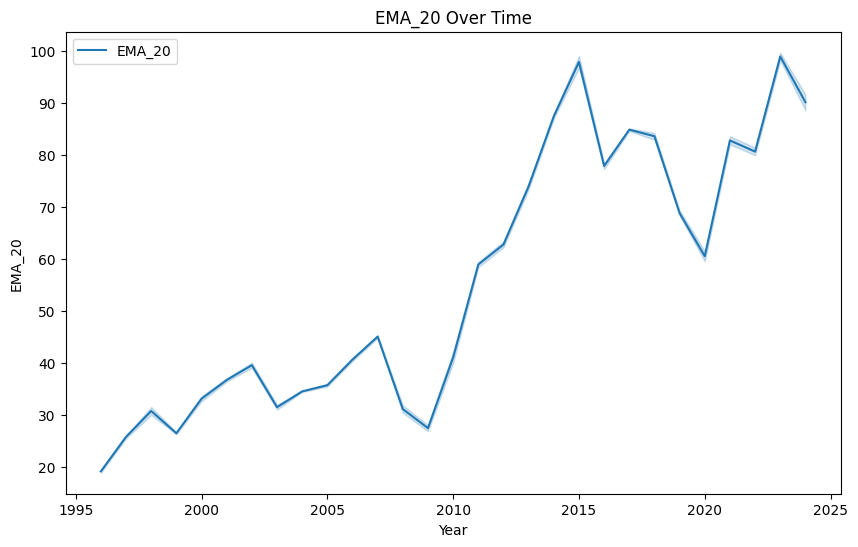

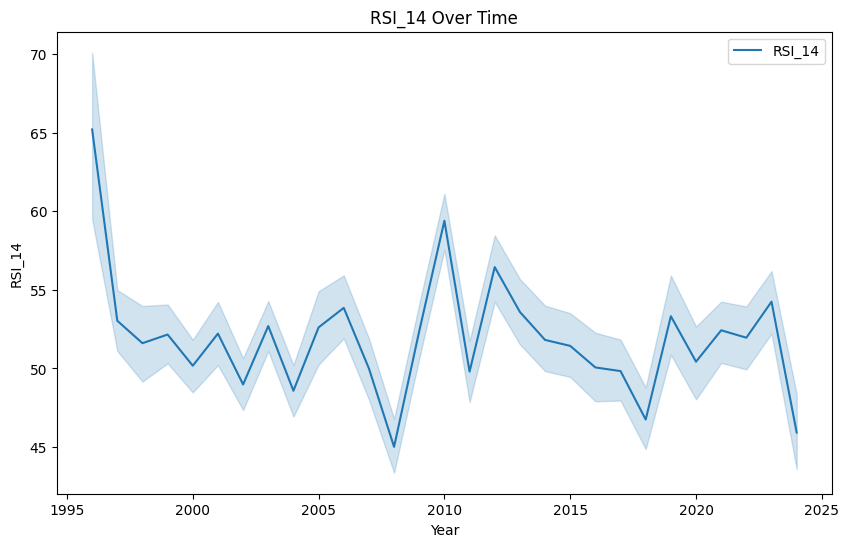

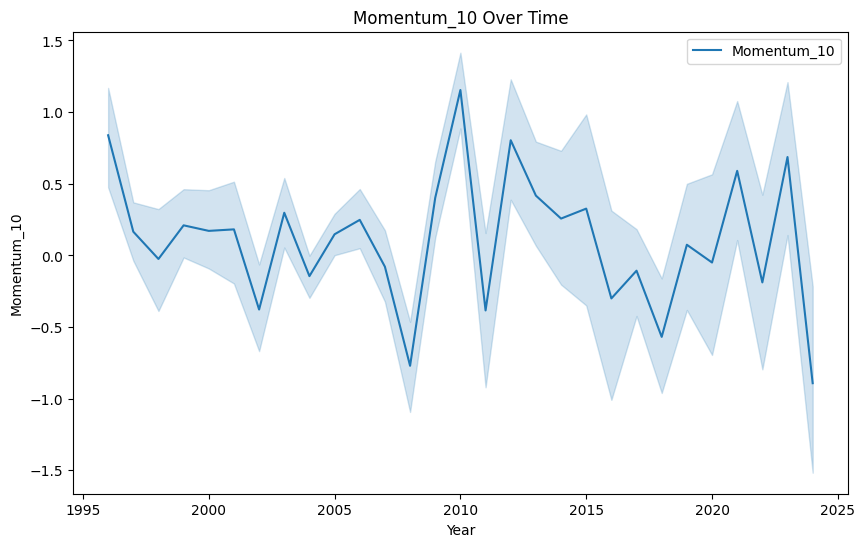

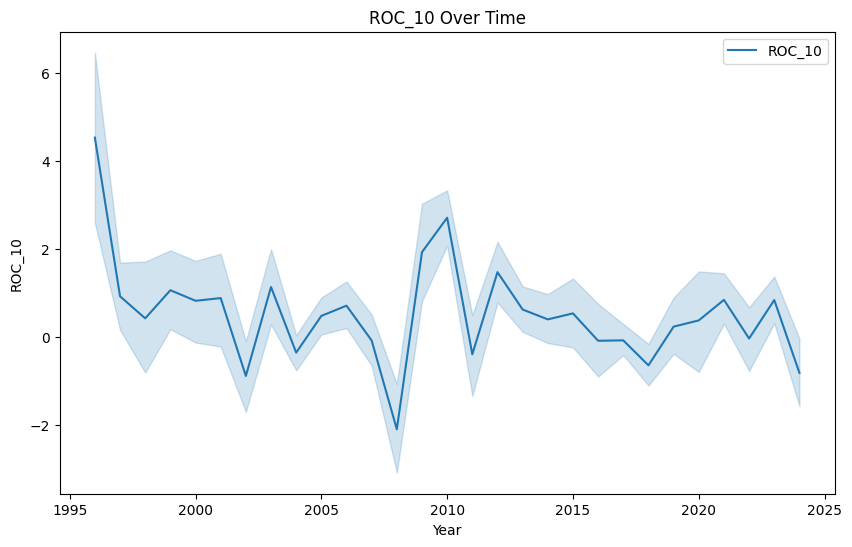

In [40]:
for col in num_cols:
  if col != 'Year':
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x='Year', y=col , label = col)
    plt.title(f'{col} Over Time')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.show()

In [ ]:
%pip install --upgrade nbformat==5.0.3

In [74]:
fig = go.Figure(data=[go.Candlestick(x=df['Year'],
                                      open=df['Open'],
                                      high=df['High'],
                                      low=df['Low'],
                                      close=df['Close'])])
fig.update_layout(title='Candlestick Chart of the L-1 regularized pre-processed and the cleaned data in the same dimension',
                  xaxis_title='Year',
                  yaxis_title='Price')
fig.show()

In [43]:
fig = go.Figure(data=[go.Candlestick(x=df['Year'],
                                      open=df['Open'],
                                      high=df['High'],
                                      low=df['Low'],
                                      close=df['Close'])])
fig.update_layout(title='Candlestick Chart of the pre-processed data in the zist of dimensionality reduction',
                  xaxis_title='Year',
                  yaxis_title='Price')
fig.show()

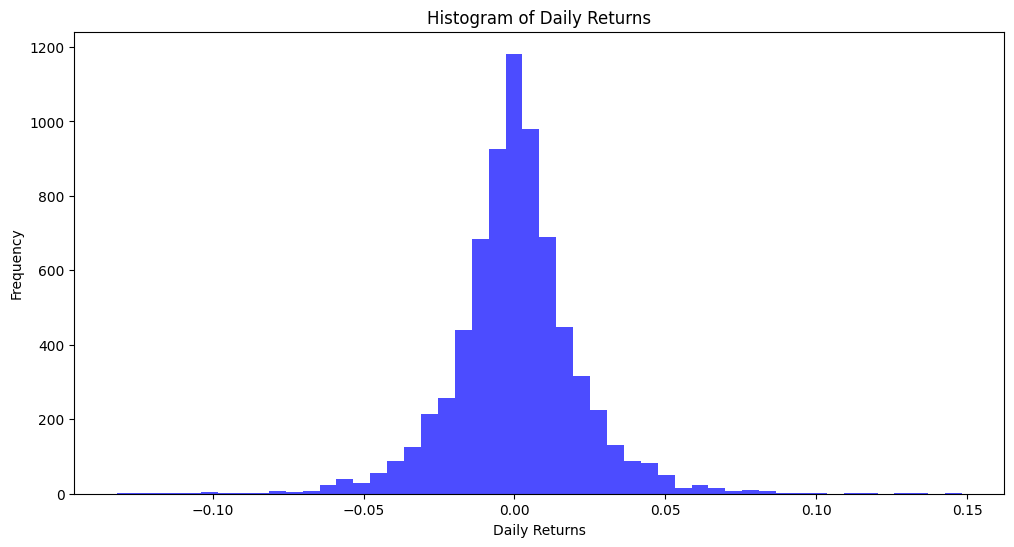

In [44]:
plt.figure(figsize=(12, 6))
plt.hist(df['Returns'].dropna(), bins=50, alpha=0.7, color='blue')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

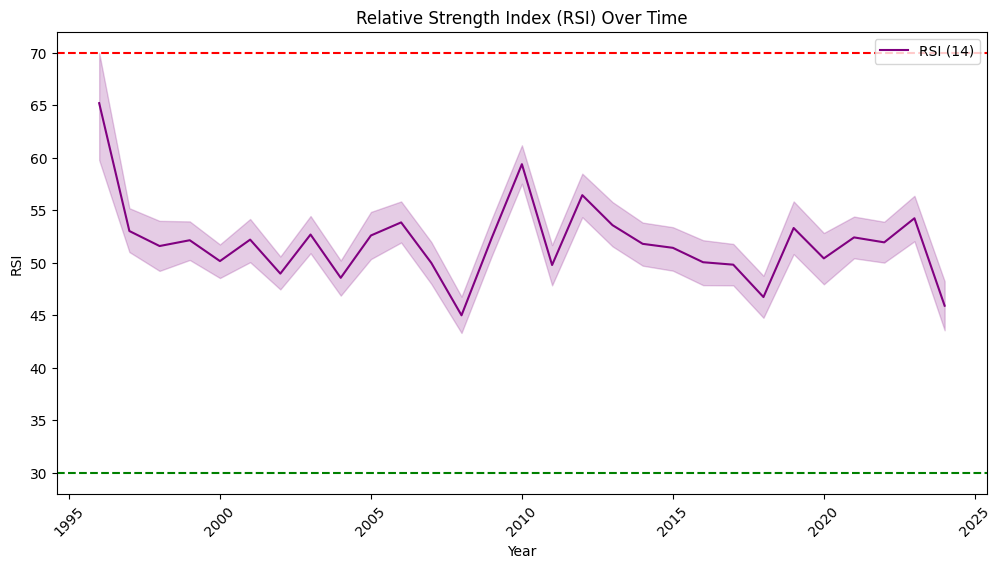

In [45]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=df['Year'], y=df['RSI_14'], label='RSI (14)', color='purple')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI) Over Time')
plt.xlabel('Year')
plt.ylabel('RSI')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [51]:
f = pd.get_dummies(df, columns=hot_cols, dtype=int)

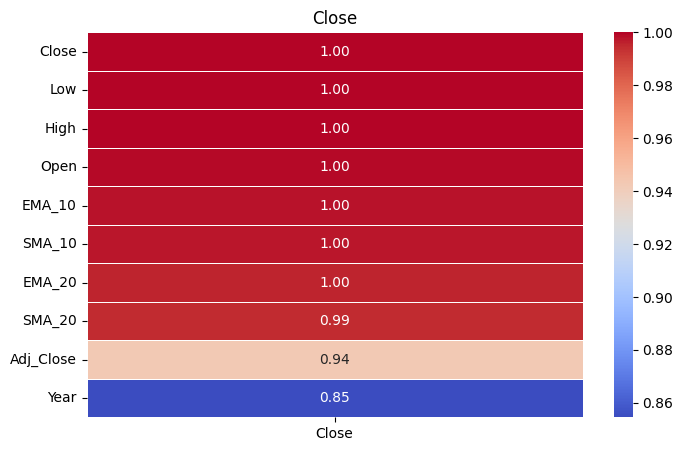

In [52]:
correlation_matrix = df.corr(numeric_only=True)
correlation = correlation_matrix['Close'].sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Close')
plt.show()

In [53]:
# threshold = 0.03

# correlation_matrix = df.corr()
# high_corr_features = correlation_matrix.index[abs(correlation_matrix["Close"]) > threshold].tolist()
# high_corr_features.remove("Close")
# print(high_corr_features)

threshold = 0.03

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Identify features with a correlation higher than the threshold with 'Close'
if "Close" in correlation_matrix.columns:
    high_corr_features = correlation_matrix.index[abs(correlation_matrix["Close"]) > threshold].tolist()
    high_corr_features.remove("Close")
    print(high_corr_features)
else:
    print("Column 'Close' not found in the DataFrame.")


['Adj_Close', 'High', 'Low', 'Open', 'Volume', 'Year', 'SMA_10', 'SMA_20', 'EMA_10', 'EMA_20', 'RSI_14', 'Momentum_10', 'ROC_10']


In [54]:
X_selected = df[high_corr_features]
Y = df["Close"]

In [55]:
X_train , X_test , y_train , y_test = train_test_split(X_selected , Y , test_size=0.2 , random_state=42) 

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
model1 = LinearRegression()
model1.fit(X_train_scaled , y_train)

LinearRegression()

In [58]:
y_pred1 = model1.predict(X_test_scaled)

In [59]:
model2 = DecisionTreeRegressor()
model2.fit(X_train_scaled , y_train)

DecisionTreeRegressor()

In [60]:
y_pred2 = model2.predict(X_test_scaled)

In [61]:
model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(X_train_scaled , y_train)

RandomForestRegressor(random_state=42)

In [62]:
y_pred3 = model3.predict(X_test_scaled)

In [63]:
model4 = SVR()
model4.fit(X_train_scaled , y_train)


SVR()

In [64]:
y_pred4 = model4.predict(X_test_scaled)

In [65]:
model5=KNeighborsRegressor()
model4.fit(X_train_scaled, y_train)

SVR()

In [66]:
model5 = KNeighborsRegressor()
model5.fit(X_train_scaled , y_train)

KNeighborsRegressor()

In [67]:
y_pred5=model5.predict(X_test_scaled)

In [68]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2


for model in [model1, model2, model3, model4, model5]:
    y_pred = model.predict(X_test_scaled)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
    print(f"{model.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2 * 100:.2f}%"+'\n')

LinearRegression
MSE: 0.1751975671052661
R2 Score: 99.97%

DecisionTreeRegressor
MSE: 0.42209651076877097
R2 Score: 99.93%

RandomForestRegressor
MSE: 0.23669941234553848
R2 Score: 99.96%

SVR
MSE: 1.5912431702364729
R2 Score: 99.75%

KNeighborsRegressor
MSE: 1.8359878938936451
R2 Score: 99.71%



In [69]:
results = []
for model in [model1, model2, model3, model4, model5]:
    mae, mse, rmse, train_r2 = evaluate_model(y_train, model.predict(X_train_scaled))
    mae, mse, rmse, test_r2 = evaluate_model(y_test, model.predict(X_test_scaled))

    results.append({
        'Model': model.__class__.__name__,
        'Train Score %': round(train_r2*100,2),
        'Test Score %': round(test_r2*100,2) })

results_df = pd.DataFrame(results)
display(results_df)

Model  Train Score %  Test Score %
0       LinearRegression          99.98         99.97
1  DecisionTreeRegressor         100.00         99.93
2  RandomForestRegressor         100.00         99.96
3                    SVR          99.74         99.75
4    KNeighborsRegressor          99.80         99.71

In [70]:
model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)

Lasso()

In [71]:
model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)

Ridge()

In [72]:
for model in [model_lasso, model_ridge]:
    y_pred = model.predict(X_test_scaled)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
    print(f"{model.__class__.__name__}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2 * 100:.2f}%"+'\n')

Lasso
MSE: 1.2837637959149257
R2 Score: 99.80%

Ridge
MSE: 0.19893824701767115
R2 Score: 99.97%



ValueError: x and y must have same first dimension, but have shapes (21,) and (17,)

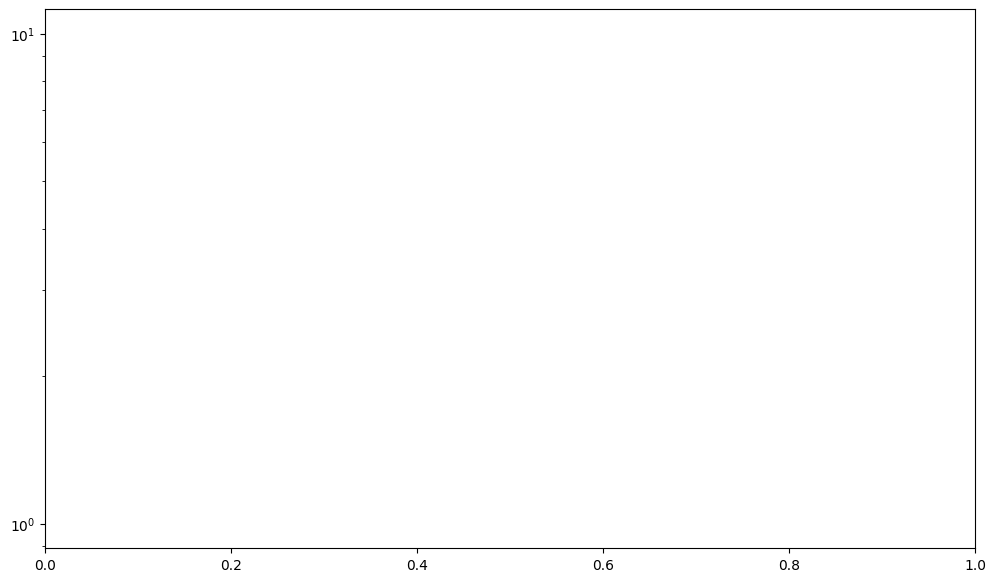

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Years data
years = np.arange(2005, 2026)

# Data volume in ZB (these are illustrative numbers based on the information given)
data_volume = np.array([0.01, 0.05, 0.1, 0.2, 0.5, 2, 4, 8, 16, 32, 44, 60, 80, 100, 120, 149, 181])

plt.figure(figsize=(12, 7))
plt.semilogy(years, data_volume, marker='o')
plt.title('Annual Data Generation from 2005 to 2025')
plt.xlabel('Year')
plt.ylabel('Data Volume (Zettabytes)')
plt.xticks(years, rotation=90)  # Rotate labels for better readability if needed
plt.grid(True, which="both", ls="-", color='0.65')

# Add annotations for some key years
plt.annotate('2 ZB', (2010, 2), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('44 ZB', (2020, 44), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('120 ZB', (2023, 120), textcoords="offset points", xytext=(0,10), ha='center')
plt.annotate('181 ZB', (2025, 181), textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

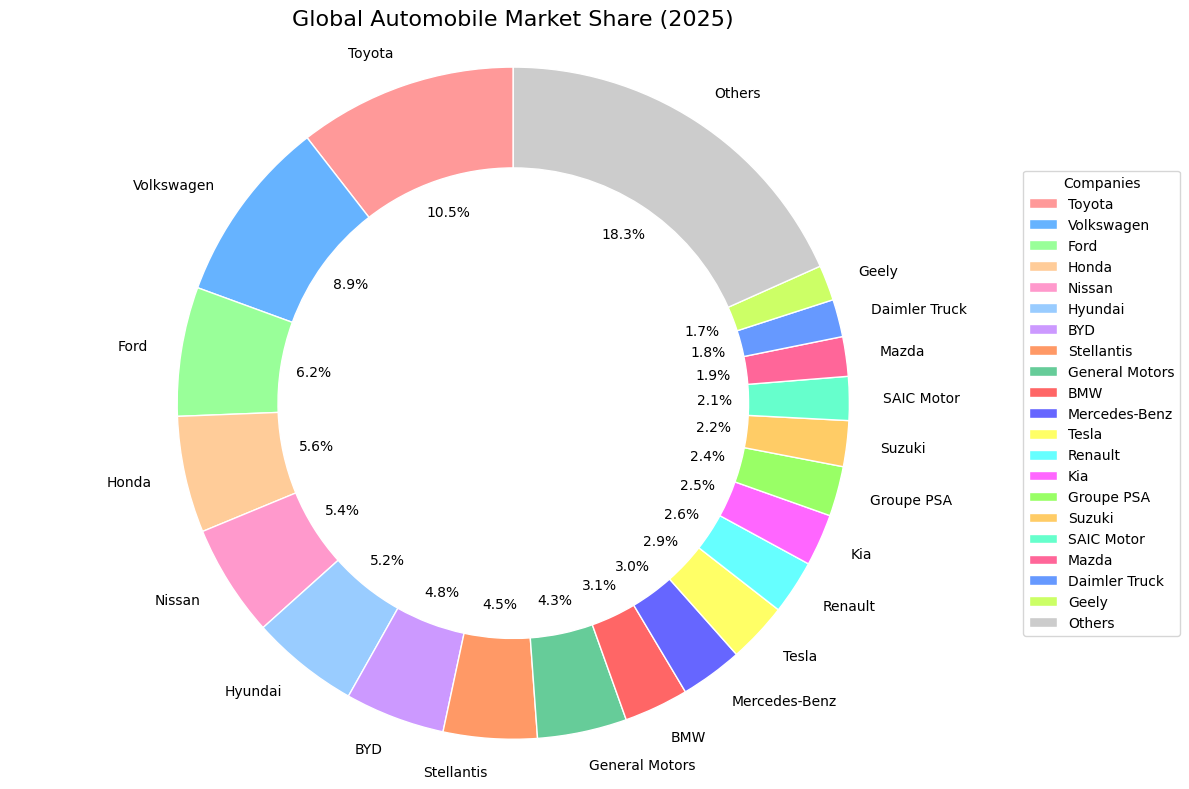

In [76]:
import matplotlib.pyplot as plt

# Data for the pie chart
companies = [
    "Toyota", "Volkswagen", "Ford", "Honda", "Nissan", "Hyundai", "BYD", 
    "Stellantis", "General Motors", "BMW", "Mercedes-Benz", "Tesla", 
    "Renault", "Kia", "Groupe PSA", "Suzuki", "SAIC Motor", "Mazda", 
    "Daimler Truck", "Geely", "Others"
]

market_share = [
    10.5, 8.9, 6.2, 5.6, 5.4, 5.2, 4.8, 4.5, 4.3, 3.1, 3.0, 2.9, 
    2.6, 2.5, 2.4, 2.2, 2.1, 1.9, 1.8, 1.7, 18.3
]

# Colors for each slice
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc', '#99ccff', '#cc99ff', 
          '#ff9966', '#66cc99', '#ff6666', '#6666ff', '#ffff66', '#66ffff', '#ff66ff', 
          '#99ff66', '#ffcc66', '#66ffcc', '#ff6699', '#6699ff', '#ccff66', '#cccccc']

# Creating the pie chart
plt.figure(figsize=(12, 8))
plt.pie(market_share, labels=companies, colors=colors, autopct='%1.1f%%', startangle=90, 
        wedgeprops=dict(width=0.3, edgecolor='w'))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adding a title
plt.title('Global Automobile Market Share (2025)', fontsize=16)

# Adding a legend
plt.legend(companies, title="Companies", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Display the chart
plt.tight_layout()
plt.show()

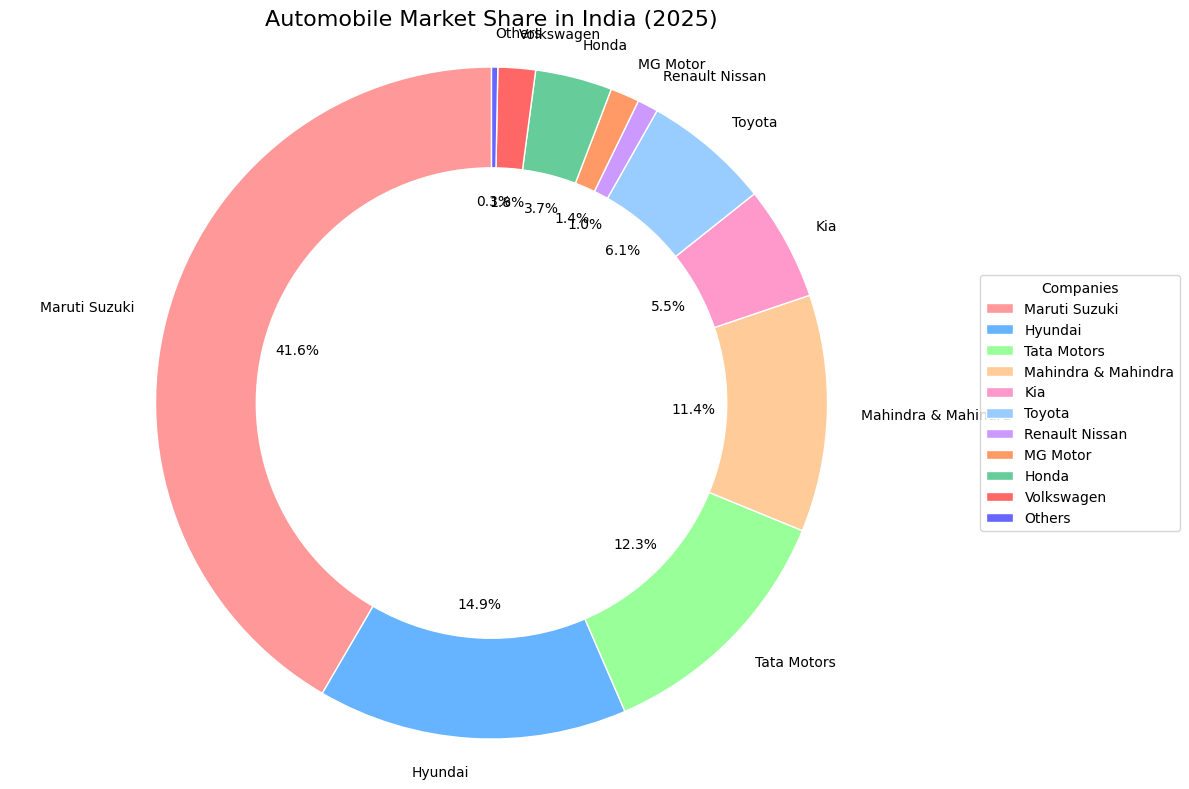

In [79]:
import matplotlib.pyplot as plt

# Data for the pie chart
companies = [
    "Maruti Suzuki", 
    "Hyundai", 
    "Tata Motors", 
    "Mahindra & Mahindra", 
    "Kia", 
    "Toyota", 
    "Renault Nissan", 
    "MG Motor", 
    "Honda", 
    "Volkswagen", 
    "Others"
]

market_share = [
    41.6, 
    14.9, 
    12.3, 
    11.4, 
    5.5, 
    6.1, 
    1.0, 
    1.4, 
    3.7, 
    1.8, 
    0.3
]

# Colors for each slice
colors = [
    '#ff9999', 
    '#66b3ff', 
    '#99ff99', 
    '#ffcc99', 
    '#ff99cc', 
    '#99ccff', 
    '#cc99ff', 
    '#ff9966', 
    '#66cc99', 
    '#ff6666', 
    '#6666ff'
]

# Creating the pie chart
plt.figure(figsize=(12, 8))
plt.pie(
    market_share, 
    labels=companies, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=90, 
    wedgeprops=dict(width=0.3, edgecolor='w')
)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Adding a title
plt.title('Automobile Market Share in India (2025)', fontsize=16)

# Adding a legend
plt.legend(
    companies, 
    title="Companies", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1)
)

# Display the chart
plt.tight_layout()
plt.show()